<a href="https://colab.research.google.com/github/Vyoma-garg/Computer_Vision/blob/main/CV_A1_Filters_DWT_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

**-------------------------Q1 FILTERING-------------------------**

[[ 87  92  97 ... 107 115 116]
 [109 112 121 ... 123 128 130]
 [162 161 172 ... 136 134 142]
 ...
 [ 82  88  89 ... 111 112 104]
 [ 84  85  84 ... 112 114 106]
 [ 83  80  83 ... 111 112 104]]


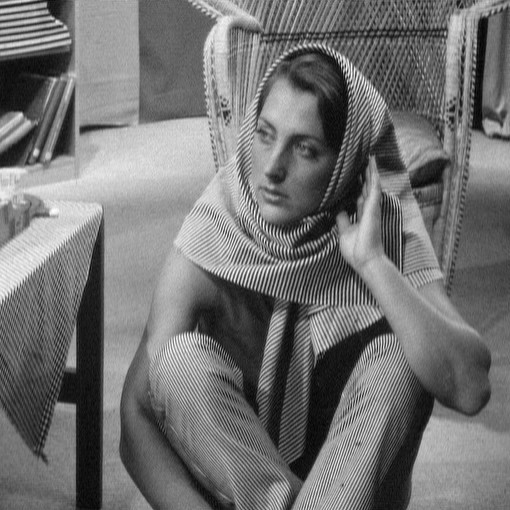

In [ ]:
img = cv2.imread('barbara.jpg',0)
print(img)
cv2_imshow(img)

In [ ]:
img.shape

(510, 510)

**Q1(a) Average Filter**

In [ ]:
def average_filter(data, filter_size):
    sum = 0
    nrow, ncol = data.shape
    new_image = np.ones([nrow,ncol])
    mask = np.ones([filter_size,filter_size])/(filter_size**2)
    for i in range(nrow-filter_size+1):# 0 to 507
        for j in range(ncol-filter_size+1):#0 to 507
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + mask[k][m]*data[i+k][j+m]
            new_image[i][j] = sum
    return new_image

Working with kernel size of 3X3 Average Filter

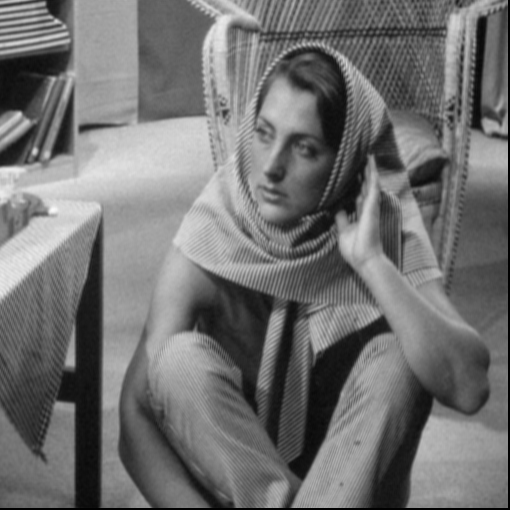

In [ ]:
cv2_imshow((average_filter(img,3)))

Working with kernel size of 7X7 Average Filter

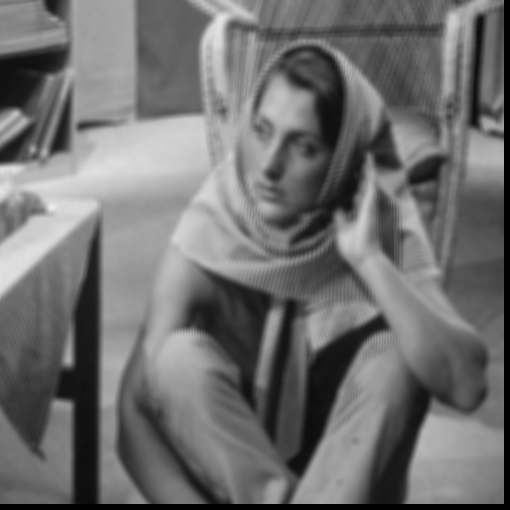

In [ ]:
cv2_imshow((average_filter(img,7)))

Working with kernel size of 9X9 Average Filter

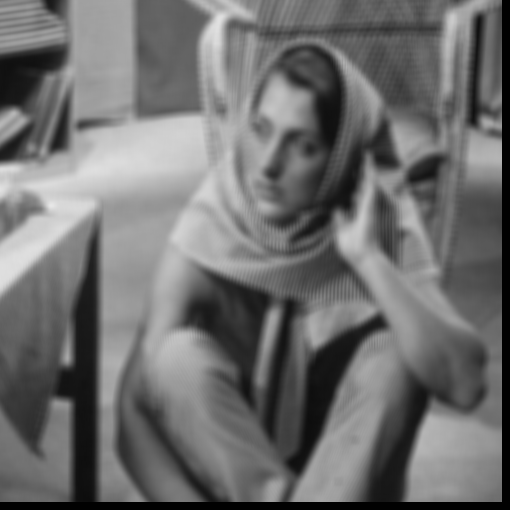

In [ ]:
cv2_imshow((average_filter(img,9)))

**Q1 (b) Median Filter**

In [ ]:
def median_filter(data, filter_size):
    nrow, ncol = data.shape
    median_output = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    mask = np.ones([filter_size,filter_size])/(filter_size**2)
    for i in range(nrow-filter_size):# 0 to 507
        for j in range(ncol-filter_size):#0 to 507
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         temp[k][m] = data[i+k][j+m]
            temp.sort()
            median_output[i][j] = temp[filter_size//2][filter_size//2]
    return median_output

Working with kernel size of 3X3 Median filter

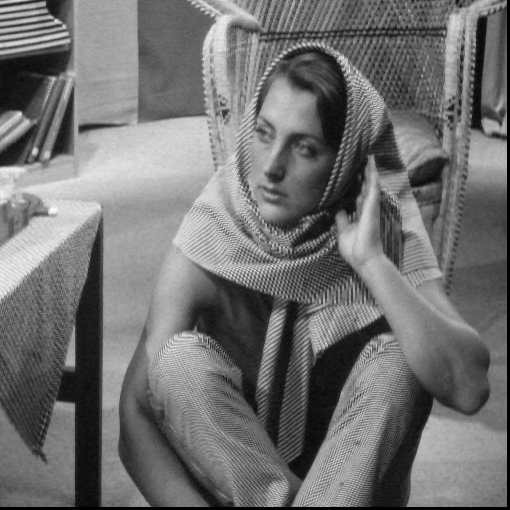

In [ ]:
cv2_imshow((median_filter(img,3)))

Working with kernel size of 7X7 Median Filter

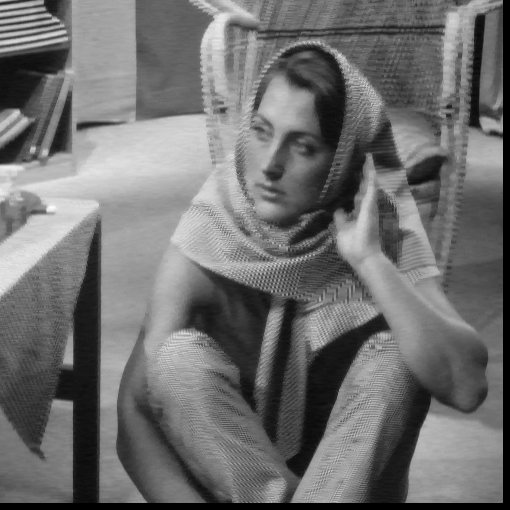

In [ ]:
cv2_imshow((median_filter(img,7)))

Working with kernel size of 9X9 Median Filter

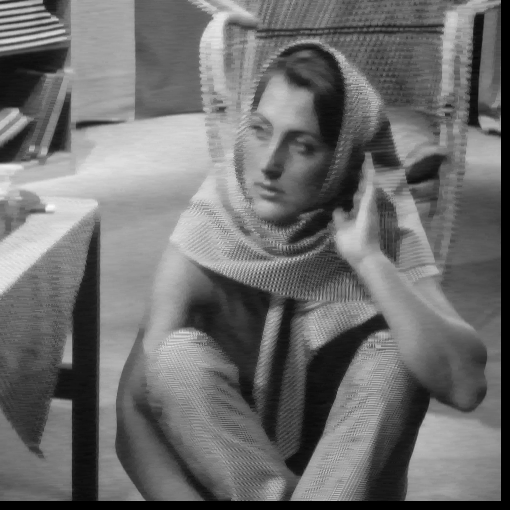

In [ ]:
cv2_imshow((median_filter(img,9)))

**Comparison of images**

In [ ]:
!pip install --upgrade scikit-image
!pip install --upgrade imutils
from skimage.metrics import structural_similarity as ssim
#from skimage.measure import compare_ssim as ssim


     |████████████████████████████████| 29.2MB 142kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
Requirement already up-to-date: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)



Difference between Avg and median 3x3 Filter
SSIM: 0.8202838518332699


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


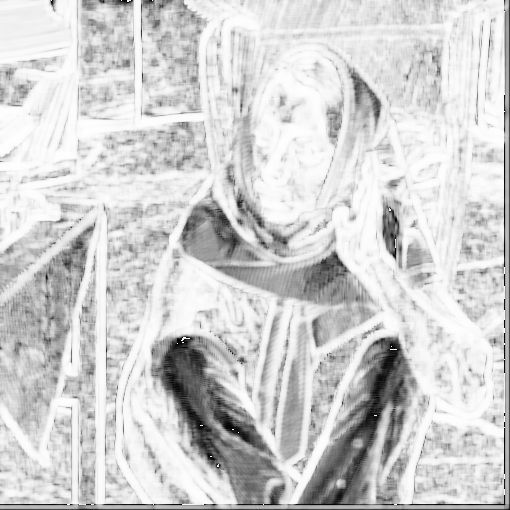


Difference between Avg and median 7x7 Filter
SSIM: 0.6034086908217287


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


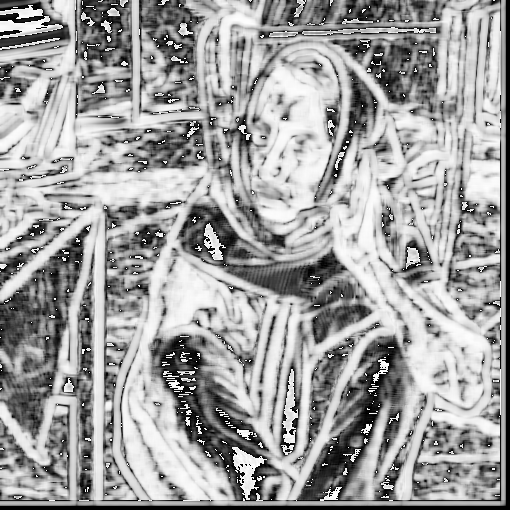


Difference between Avg and median 7x7 Filter
SSIM: 0.5444809005457563


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


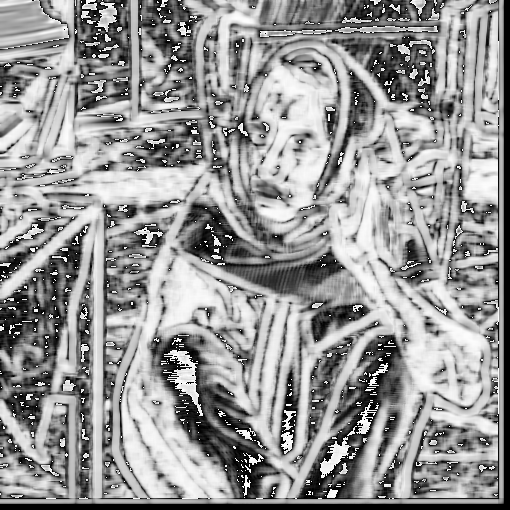

In [ ]:
print('\nDifference between Avg and median 3x3 Filter')
(score1, diff1) = ssim((average_filter(img,3)), (median_filter(img,3)),full=True)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM: {}".format(score1))  
cv2_imshow(diff1)

print('\nDifference between Avg and median 7x7 Filter')
(score2, diff2) = ssim((average_filter(img,7)), (median_filter(img,7)),full=True)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM: {}".format(score2))  
cv2_imshow(diff2)

print('\nDifference between Avg and median 7x7 Filter')
(score3, diff3) = ssim((average_filter(img,9)), (median_filter(img,9)),full=True)
diff3 = (diff3 * 255).astype("uint8")
print("SSIM: {}".format(score3))  
cv2_imshow(diff3)

**--------------Q2 Affine Transformation-----------**

**Q2 (a) Translation by 2 pixels in y direction**

In [ ]:
def translation(data, filter_size):
    tx=2
    ty=2
    translation_matrix = np.array([[1,0,tx],[0,1,ty],[0,0,1]])
    nrow, ncol = data.shape
    translated_image = np.zeros([nrow,ncol])
    temp = np.ones([filter_size,1])
   
    for outer in range(0,nrow-2,2):
        for j in range(0,ncol):
            for i in range(0,filter_size-1):  #0,1
                x=outer+i                
                temp[i] =x
                #print(temp)
            
            multiplicatn_output = translation_matrix @ temp #3x3 @ 3x1
            mul_result=multiplicatn_output.astype(int)
            mul_res=np.reshape(mul_result,(-1))
            #print(mul_res)
            p=mul_res[0]
            #print(p)
            q=mul_res[1]
            translated_image[outer][j] = data[p][j]
            translated_image[outer+1][j] = data[q][j]
 
    return translated_image

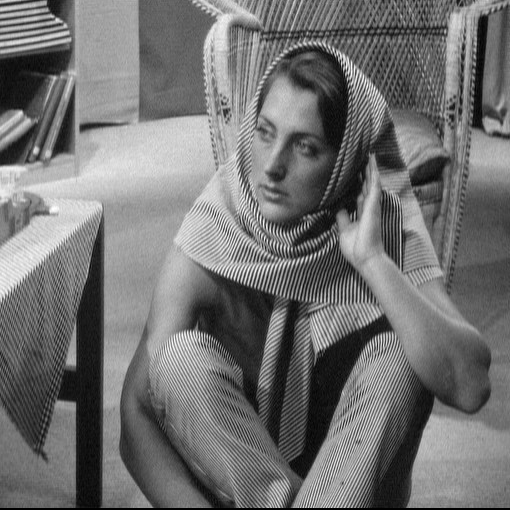

(510, 510)


In [ ]:
translated_output = translation(img,3)
cv2_imshow(translation(img,3))
print(translated_output.shape)

**Q2(b) Scaling by a factor of 2 in the x-direction**

In [ ]:
def scaling(data, filter_size):
    Sx=2
    scaling_matrix = np.array([[Sx,0,0],[0,1,0],[0,0,1]])
    nrow, ncol = data.shape
    scaled_image = np.zeros([nrow,ncol*Sx])
    temp = np.ones([filter_size,1])
   
    for outer in range(0,nrow):
        for j in range(0,ncol):
            x=j              
            temp[0] =x

            multiplicatn_output = scaling_matrix @ temp
            mul_result=multiplicatn_output.astype(int)
            mul_res=np.reshape(mul_result,(-1))
            #print(mul_res)
            p=mul_res[0]
            #print(p)
            scaled_image[outer][p] = data[outer][j]

    return scaled_image

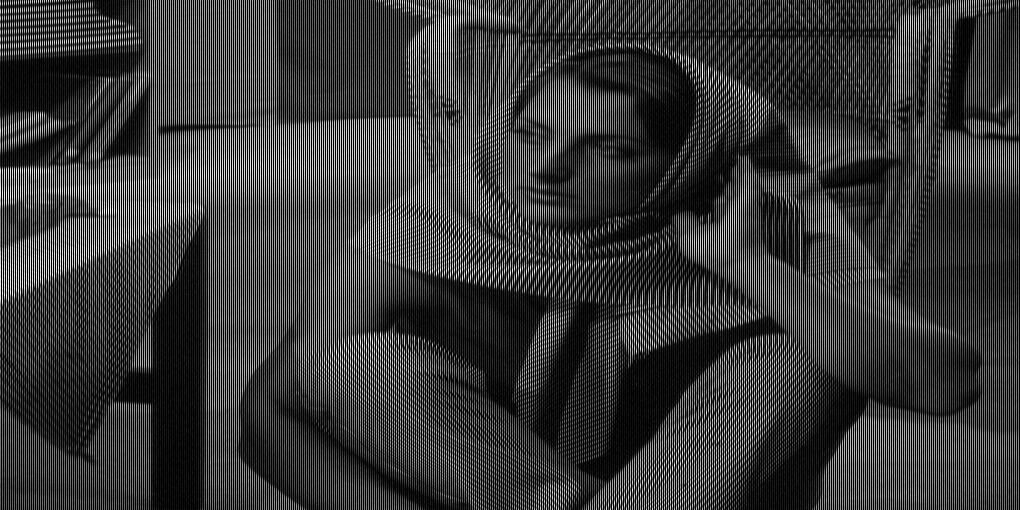

(510, 1020)


In [ ]:
scaled_output = scaling(img,3)
cv2_imshow(scaling(img,3))
print(scaled_output.shape)

**Q2(c) Rotation by 30 degrees in the anti-clockwise direction**

In [ ]:
def rotation(data, filter_size):
    angle=30
    c, s = np.cos(np.radians(-angle)), np.sin(np.radians(-angle))
    rot_matrix = np.array([[c, s, 0], [-s, c, 0], [0, 0, 1]])

    x, y = np.array(data.shape) // 2
    # move center to Origin (0, 0)
    translate1 = np.array([[1, 0, -x], [0, 1, -y], [0, 0, 1]])
    # move center back to Image center(x, y)
    translate2 = np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])
    #Composing all 3 transformations together
    rotation_matrix = (translate2 @ rot_matrix @ translate1)
    #print(rotated_matrix)

    nrow, ncol = data.shape
    rotated_image = np.zeros([nrow,ncol])

    temp = np.ones([filter_size,1])
   
    for outer in range(0,nrow-1):
        for j in range(0,ncol-1):    
            temp[0]=outer
            temp[1]= j
            
            multiplicatn_output = (rotation_matrix @ temp)#3x3 @ 3x1
            mul_result=multiplicatn_output.astype(int)
            mul_res=np.reshape(mul_result,(-1))
            #print(mul_res)
            p=mul_res[0]
            #print(p)
            q=mul_res[1]
            if(p<nrow) and (q<ncol) and (p>=0) and (q>=0):
              rotated_image[p][q] = data[outer][j]
 
    return rotated_image

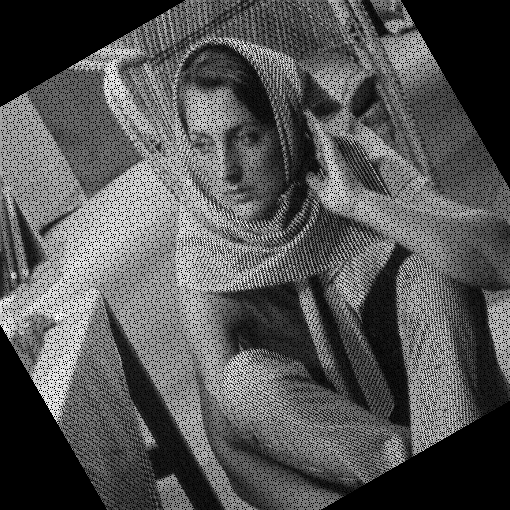

(510, 510)


In [ ]:
rotated_output = rotation(img,3)
cv2_imshow(rotation(img,3))
print(rotated_output.shape)

**Q2(d) Combining the three operations**

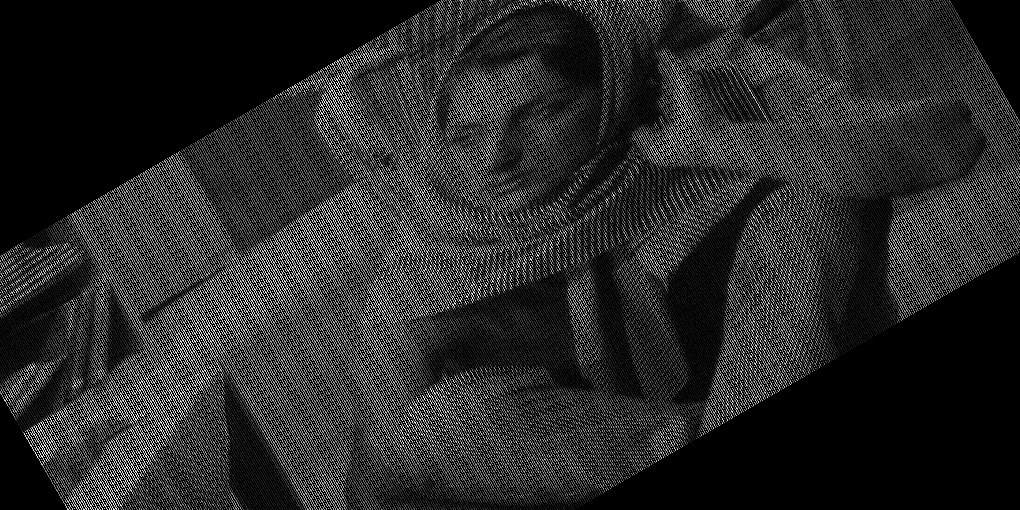

(510, 1020)


In [ ]:
affine=rotation(scaling(translation(img,3),3),3)
cv2_imshow(affine)
print(affine.shape)

**Q3. Image Sharpening using Laplacian**

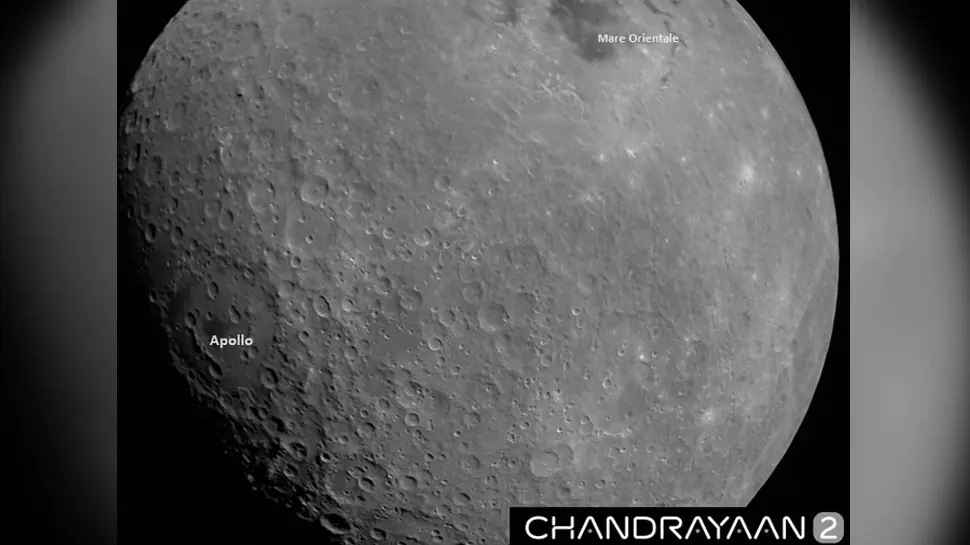

In [ ]:
img_2 = cv2.imread('/content/816813-chandrayaan-2.jpg',0)
cv2_imshow(img_2)

In [ ]:
def laplacian_filter(data, filter_size):
    nrow, ncol = data.shape
    laplacian_output = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    laplacian_mask = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

    for i in range(nrow-filter_size+1):# 1,508
        for j in range(ncol-filter_size+1):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + laplacian_mask[k][m]*data[i+k][j+m]
            laplacian_output[i][j] = sum
    return laplacian_output

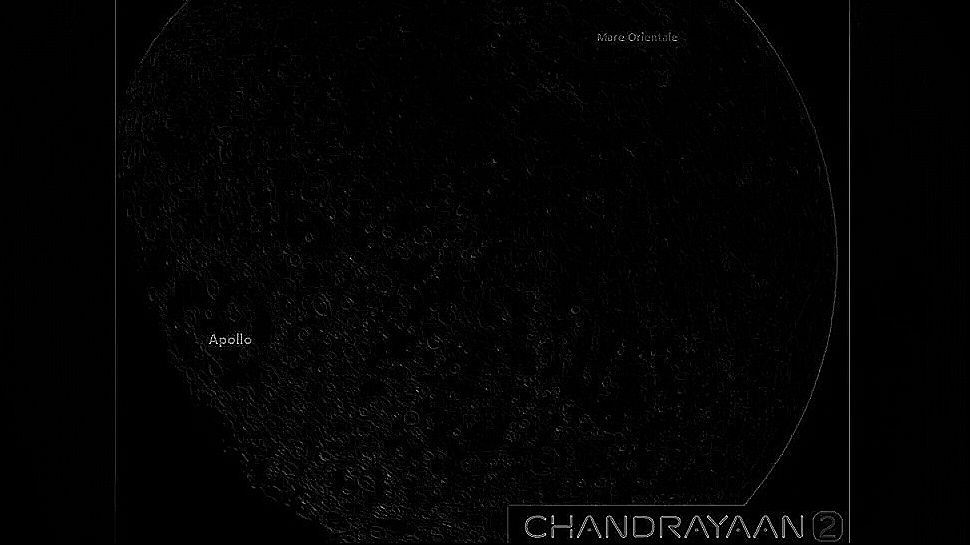

In [ ]:
laplacian_output = laplacian_filter(img_2,3)  # FILTER SIZE=3
cv2_imshow(laplacian_filter(img_2,3))

Adding Laplacian Filtered Output to the original image

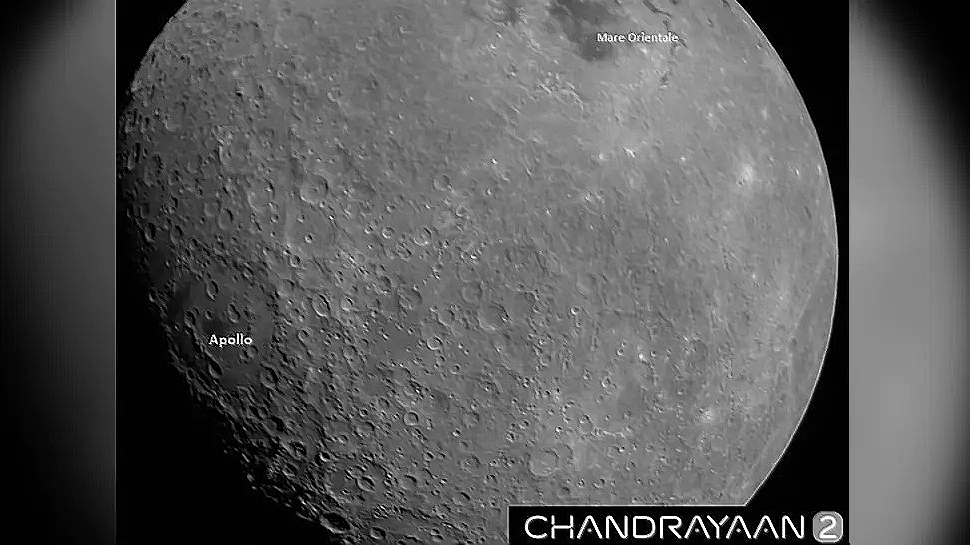

In [ ]:
cv2_imshow(laplacian_output+img_2)


Difference between Original and Laplacian filtered image
SSIM: 0.08172184151345997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


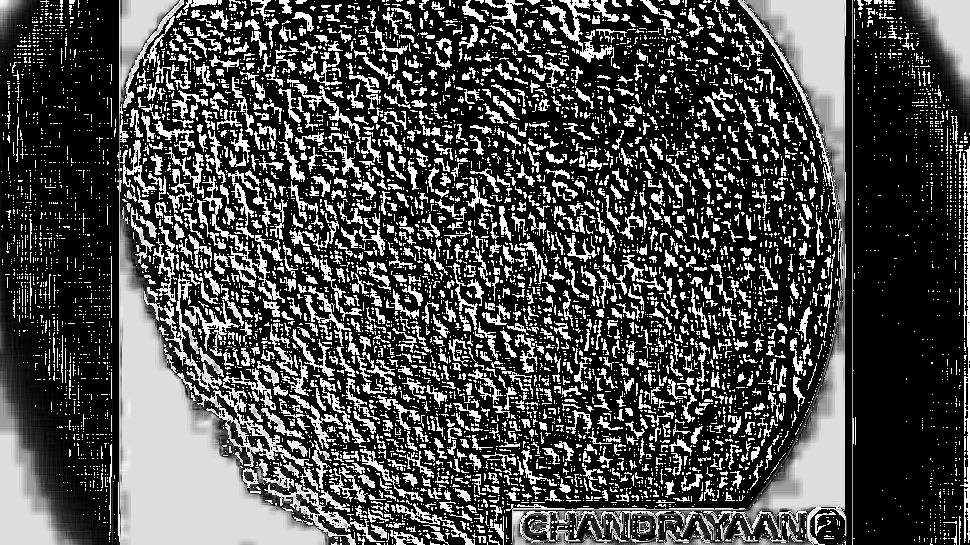

In [ ]:
print('\nDifference between Original and Laplacian filtered image')
(score4, diff4) = ssim(img_2, laplacian_output,full=True)
diff4 = (diff4 * 255).astype("uint8")
print("SSIM: {}".format(score4))  
cv2_imshow(diff4)

**Q3 (b) Using Sharpening Filter**

In [ ]:
def sobel(data, filter_size):
    nrow, ncol = data.shape
    sobel_image = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    sobel_mask = np.array([[-1,-2-1],[0,0,0],[1,2,1]])

    for i in range(nrow-filter_size):# 1,508
        for j in range(ncol-filter_size):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                  if i>0 and j>0 and k > 0 and m>0:
                    sum = sum + sobel_mask[k][m]*data[i+k][j+m]
                    #print(sum)
                        
            sobel_image[i][j] = sum
    return sobel_image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


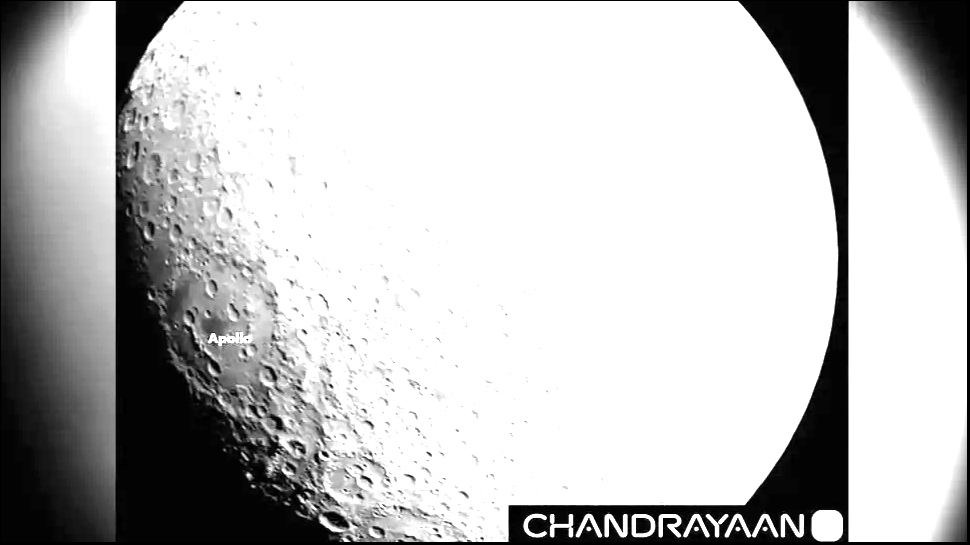

In [ ]:
sobel_output = sobel(img_2,3)
cv2_imshow(sobel(img_2,3))

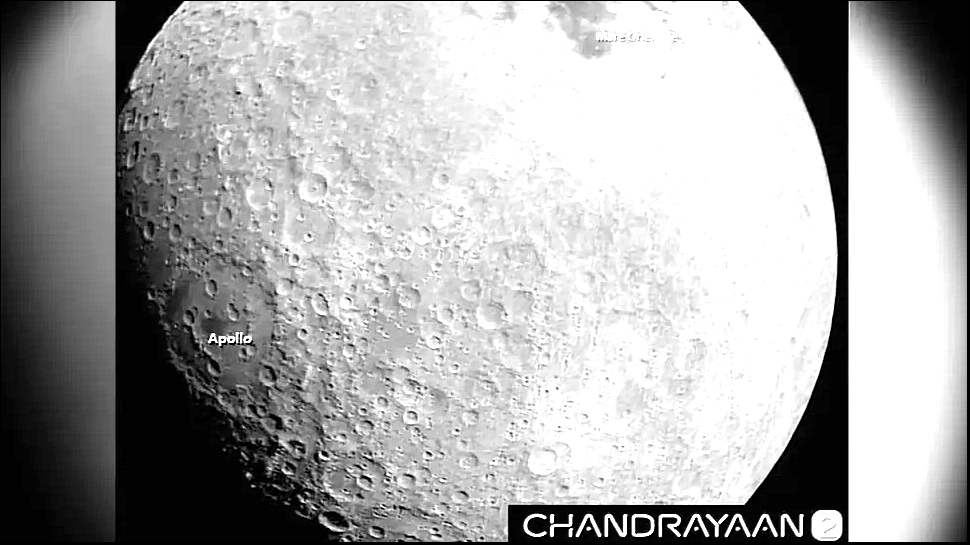


Difference between Sobel filtered image and original image
SSIM: 0.001689117017343538


In [ ]:
cv2_imshow(sobel_output-img_2)

print('\nDifference between Sobel filtered image and original image')
(score5, diff5) = ssim(sobel_output, laplacian_output,full=True)
diff5 = (diff5 * 255).astype("uint8")
print("SSIM: {}".format(score5))  
#cv2_imshow(diff5)


Difference between Sobel filtered image and Laplacian filtered image
SSIM: 0.001689117017343538


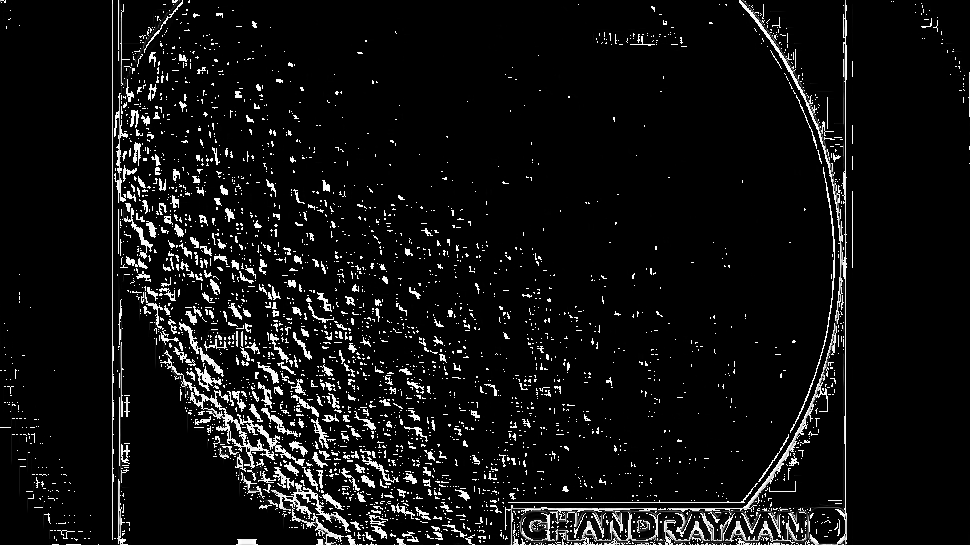

In [ ]:
print('\nDifference between Sobel filtered image and Laplacian filtered image')
(score5, diff5) = ssim(sobel_output, laplacian_output,full=True)
diff5 = (diff5 * 255).astype("uint8")
print("SSIM: {}".format(score5))  
cv2_imshow(diff5)

**Q4 Discrete Wavelet Transform -----------------------**

**Q4 (a) DWT Using Haar**

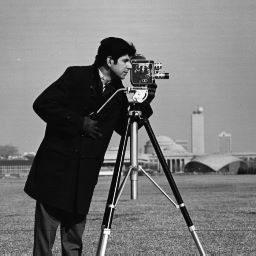

In [ ]:
cameraimg=cv2.imread('/content/cameraman.jpg',0)
cv2_imshow(cameraimg)


 LL COEFF:
 [[314.  314.  314.  ... 306.5 303.5 306.5]
 [315.  315.  315.  ... 311.5 309.5 305. ]
 [311.  311.  311.  ... 299.5 297.5 302. ]
 ...
 [228.  207.5 253.  ... 196.  179.  198. ]
 [246.5 228.  231.5 ... 231.  268.5 244. ]
 [248.5 291.5 268.  ... 257.5 248.5 245. ]]

 LH COEFF:
 [[  0.    0.    0.  ...  -2.5  -2.5   0.5]
 [  1.    1.    1.  ...   1.5   1.5   0. ]
 [  1.    1.    1.  ...   2.5   2.5   1. ]
 ...
 [ 14.   12.5  11.  ...  26.   -3.  -27. ]
 [ -1.5  19.   -2.5 ... -20.  -14.5   5. ]
 [ -1.5   4.5  14.  ...  -5.5  -0.5  12. ]]

 HL COEFF:
 [[  0.    0.    0.  ...   1.5  -0.5  -0.5]
 [  0.    0.    0.  ...  -0.5   0.5   1. ]
 [  0.    0.    0.  ...   2.5  -0.5  -1. ]
 ...
 [-11.    8.5 -31.  ... -18.  -13.   -4. ]
 [ -5.5  23.  -45.5 ...  -5.   -1.5  17. ]
 [ -8.5 -38.5 -53.  ...  -5.5 -17.5  15. ]]

 HH COEFF:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.00000000e-01
  -5.00000000e-01 -5.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 .

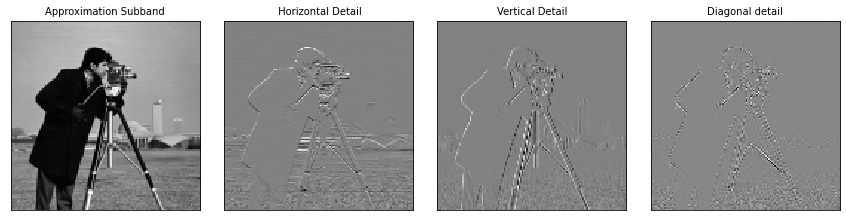

In [ ]:
import pywt
import pywt.data
import matplotlib.pyplot as plt

titles = ['Approximation Subband', ' Horizontal Detail','Vertical Detail', 'Diagonal detail']
coefficients = pywt.dwt2(cameraimg, 'haar')
LL, (LH, HL, HH) = coefficients

print('\n LL COEFF:\n', LL)
print('\n LH COEFF:\n', LH)
print('\n HL COEFF:\n', HL)
print('\n HH COEFF:\n', HH)
figure = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = figure.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

figure.tight_layout()
plt.show()

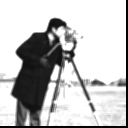

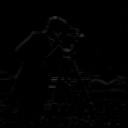

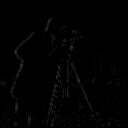

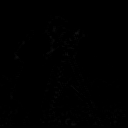

In [ ]:
cv2_imshow((average_filter(LL,3)))
cv2_imshow((average_filter(LH,3)))
cv2_imshow((average_filter(HL,3)))
cv2_imshow((average_filter(HH,3)))

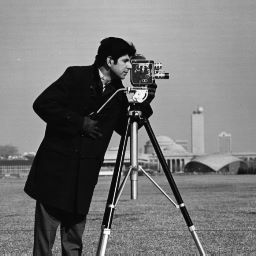



Smoothed Reconstructed Image after using Haar 


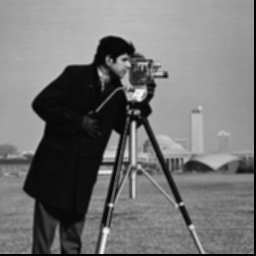

In [ ]:
#INVERSE DWT Using Haar
reconstructed_cameraman = pywt.idwt2(coefficients, 'haar')
cv2_imshow(pywt.idwt2(coefficients, 'haar'))
#Smoothed Reconstructed Image
print('\n\nSmoothed Reconstructed Image after using Haar ')
cv2_imshow((average_filter(reconstructed_cameraman,3)))

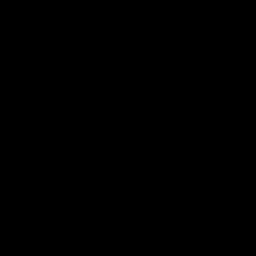

False


In [ ]:
cv2_imshow(cameraimg - reconstructed_cameraman) #Black means almost similar reconstructed Image
 
if cameraimg is reconstructed_cameraman:
    print(True)
else:
    print(False)

DWT Using DB9/7
Using bior4.4 which is similar to cdf97 as per the article: https://github.com/PyWavelets/pywt/issues/176 


 LL COEFF:
 [[321.61202406 319.17814166 318.18582188 ... 303.55164561 302.66041839
  302.10946706]
 [319.21557321 317.87191174 318.27761073 ... 307.28432671 305.20016642
  304.81433425]
 [317.40209662 318.72875703 318.36841027 ... 299.20494127 301.86530546
  302.76145129]
 ...
 [241.83515837 226.22600303 245.17364761 ... 252.01360252 241.08450757
  241.50329954]
 [256.50901416 255.45226626 280.5310874  ... 266.11038304 239.33039853
  245.48748801]
 [255.84430192 287.81852058 292.51115497 ... 262.99116932 231.2257739
  239.27563126]]

 LH COEFF:
 [[-3.04267133e-01  1.87499968e-01 -1.34027803e-01 ... -9.63981558e-01
  -9.40873648e-02  1.60915310e-01]
 [ 2.30031169e-02 -6.76674512e-01 -3.64218609e-01 ...  4.57865557e-02
   1.61099881e-01  1.31079965e-01]
 [ 5.37237144e-01 -6.60847204e-02 -1.14525128e-01 ...  1.10561434e+00
  -1.53425682e-01 -8.94566506e-01]
 ...
 [-2.35105368e+01 -1.89057713e+01  2.58137182e+00 ... -8.26286656e+00
   2.76533560e+00 -4.07627383e+00]
 [ 1.81491673e+01  2.3

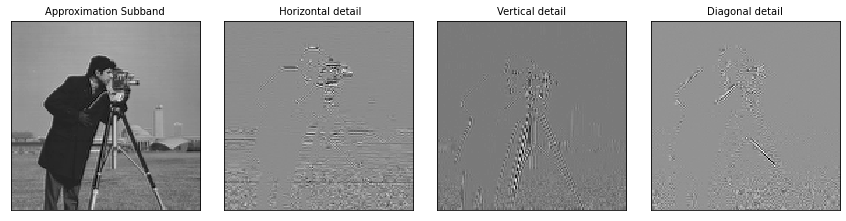

In [ ]:
import pywt
import pywt.data
import matplotlib.pyplot as plt
 
titles = ['Approximation Subband', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
#coeffsdb = pywt.dwt2(cameraimg, 'db9')

coeffsdb = pywt.dwt2(cameraimg, 'bior4.4')
LLdb, (LHdb, HLdb, HHdb) = coeffsdb
print('\n LL COEFF:\n', LLdb)
print('\n LH COEFF:\n', LHdb)
print('\n HL COEFF:\n', HLdb)
print('\n HH COEFF:\n', HHdb)
 
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LLdb, LHdb, HLdb, HHdb]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
 
fig.tight_layout()
plt.show()

In [ ]:
LL1 = np.array(cv2.resize(LL, (300,300)), dtype=int)
LL2 = np.array(cv2.resize(LLdb, (300,300)), dtype=int)
 
LH1 = np.array(cv2.resize(LH, (300,300)), dtype=int)
LH2 = np.array(cv2.resize(LHdb, (300,300)), dtype=int)
 
HL1 = np.array(cv2.resize(HL, (300,300)), dtype=int)
HL2 = np.array(cv2.resize(HLdb, (300,300)), dtype=int)
 
HH1 = np.array(cv2.resize(HH, (300,300)), dtype=int)
HH2 = np.array(cv2.resize(HHdb, (300,300)), dtype=int)

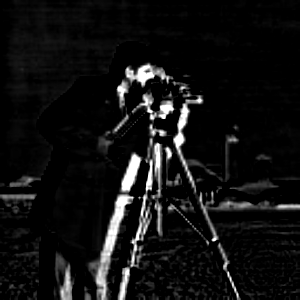

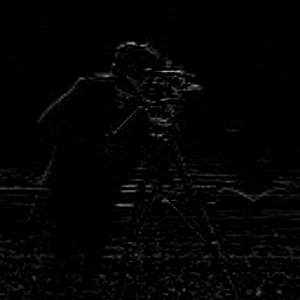

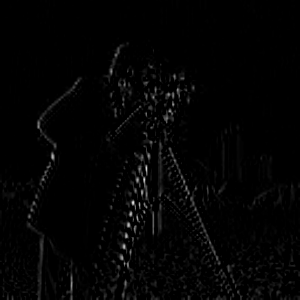

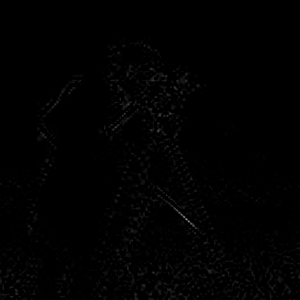

In [ ]:
cv2_imshow(LL1-LL2)
cv2_imshow(LH1-LH2)
cv2_imshow(HL1-HL2)
cv2_imshow(HH1-HH2)

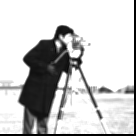

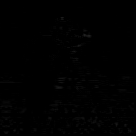

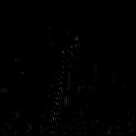

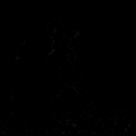

In [ ]:
cv2_imshow((average_filter(LLdb,3)))
cv2_imshow((average_filter(LHdb,3)))
cv2_imshow((average_filter(HLdb,3)))
cv2_imshow((average_filter(HHdb,3)))

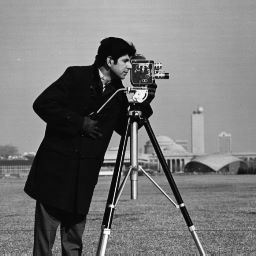



Smoothed Reconstructed Image after using DB9 


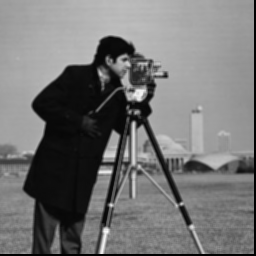

In [ ]:
#INVERSE DWT
reconstructed_cameramandb = pywt.idwt2(coeffsdb, 'bior4.4')
cv2_imshow(pywt.idwt2(coeffs2, 'bior4.4'))
#Smoothed Reconstructed Image
print('\n\nSmoothed Reconstructed Image after using DB9/7 ')
cv2_imshow((average_filter(reconstructed_cameramandb,3)))

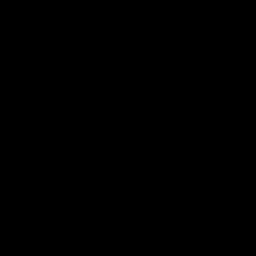

False


In [ ]:
cv2_imshow(cameraimg - reconstructed_cameramandb) #Black means almost similar reconstructed Image

if cameraimg is reconstructed_cameramandb:
    print(True)
else:
    print(False)

**Q4(d) Gaussian Smoothing Filter**

In [ ]:
#Gaussian Filter
def gaussian(data, filter_size):
    nrow, ncol = data.shape
    gaussian_output = np.zeros([nrow,ncol])
    temp = np.zeros([filter_size, filter_size])
    gaussian_mask = np.array([[1,2,1],[2,4,2],[1,2,1]])
    for i in range(nrow-filter_size+1):# 1,508
        for j in range(ncol-filter_size+1):#1,508
            sum = 0
            for k in range(filter_size): #0,1,2
                for m in range(filter_size): #0,1,2
                         sum = sum + gaussian_mask[k][m]*data[i+k][j+m]
            gaussian_output[i][j] = sum
    return gaussian_output

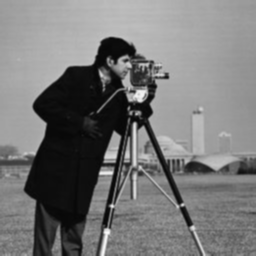

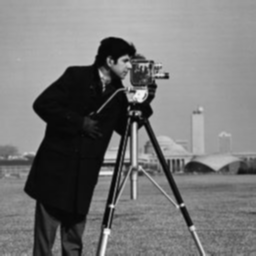


Difference between Gaussian_ Original image and Gaussian_ Reconstructed IDWT Haar image
SSIM: 0.9992530176071841


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


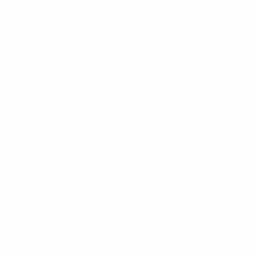

In [ ]:
Org_gaus=cv2.GaussianBlur(cameraimg,(3,3),0)
recons_haar_gauss=cv2.GaussianBlur(reconstructed_cameraman,(3,3),0 )
cv2_imshow(Org_gaus)
cv2_imshow(recons_haar_gauss)
 
print('\nDifference between Gaussian_ Original image and Gaussian_ Reconstructed IDWT Haar image')
(score6, diff6) = ssim(Org_gaus, recons_haar_gauss,full=True)
diff6 = (diff6 * 255).astype("uint8")
print("SSIM: {}".format(score6))  
cv2_imshow(diff6)

**Q5 Image Watermarking Techniques**

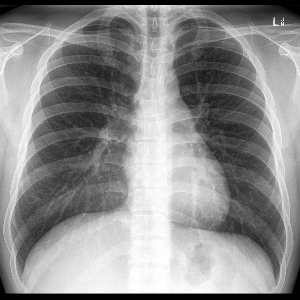

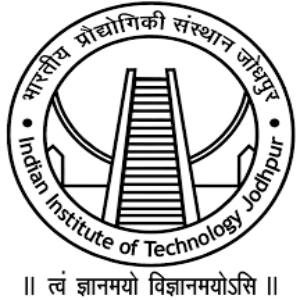

In [ ]:
import cv2
xray = cv2.imread('normal-frontal-chest-x-ray.jpg',0)
watermark = cv2.imread('iitj_logo.png',0)
xray_resized = np.array(cv2.resize(xray, (300,300)), dtype=int)
watermark_resized = np.array(cv2.resize(watermark, (300,300)), dtype=int)
cv2_imshow(xray_resized)
cv2_imshow(watermark_resized)

Watermarked Image


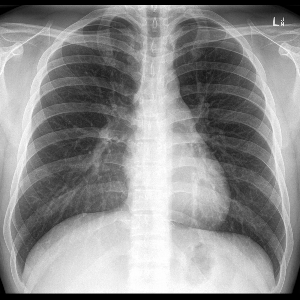


Differnce between original image and watermarked image


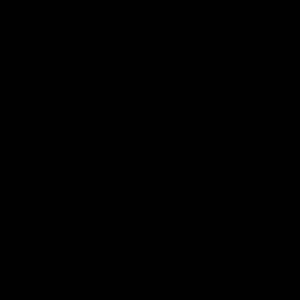

In [ ]:
#invisible watermarking 
coeff_cover = pywt.dwt2(xray_resized, 'haar')
LL1, (LH1, HL1, HH1) = coeff_cover

coeff_watermark = pywt.dwt2(watermark_resized, 'haar')
LL2, (LH2, HL2, HH2) = coeff_watermark

alpha=0.01
LH3 = LH1 + (alpha*LH2)
HL3 = HL1 + (alpha*HL2)
HH3 = HH1 + (alpha*HH2)
coeff_final = LL1,(LH3,HL3,HH3)

watermarked_img = pywt.idwt2(coeff_final, 'haar')
print('Watermarked Image')
cv2_imshow(watermarked_img)
print('\nDiffernce between original image and watermarked image')
cv2_imshow(xray_resized - watermarked_img)

Comparison Between Original Image and Invisible Watermarked Image


Difference between Original image and Invisible watermarked image
SSIM: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


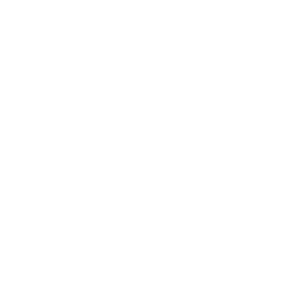

In [ ]:
print('\nDifference between Original image and Invisible watermarked image')
(score7, diff7) = ssim(xray_resized,watermarked_img ,full=True)
diff7 = (diff7 * 255).astype("uint8")
print("SSIM: {}".format(score7))  
cv2_imshow(diff7)

Watermarked Image


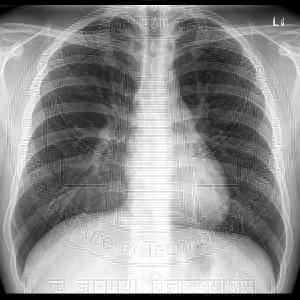


Differnce between original image and watermarked image


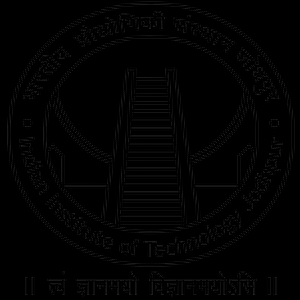

In [ ]:
#invisible watermarking 
coeff_cover = pywt.dwt2(xray_resized, 'haar')
LL1, (LH1, HL1, HH1) = coeff_cover

coeff_watermark = pywt.dwt2(watermark_resized, 'haar')
LL2, (LH2, HL2, HH2) = coeff_watermark

alpha=0.3
LH3 = LH1 + (alpha*LH2)
HL3 = HL1 + (alpha*HL2)
HH3 = HH1 + (alpha*HH2)
coeff_final = LL1,(LH3,HL3,HH3)

watermarked_img2 = pywt.idwt2(coeff_final, 'haar')
print('Watermarked Image')
cv2_imshow(watermarked_img2)
print('\nDiffernce between original image and watermarked image')
cv2_imshow(xray_resized - watermarked_img2)


Difference between Original image and Invisible watermarked second image
SSIM: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


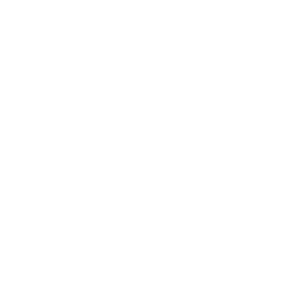

In [ ]:
print('\nDifference between Original image and Invisible watermarked second image')
(score8, diff8) = ssim(xray_resized,watermarked_img2 ,full=True)
diff8 = (diff8 * 255).astype("uint8")
print("SSIM: {}".format(score8))  
cv2_imshow(diff8)